In [1]:
%matplotlib inline
import hydro3
import constants as pc
import numpy as np
import matplotlib.pyplot as plt

# Lab 3 -- a numerical convergence study using the Taylor-Sedov blast wave problem

In this lab, we will set up a numerical experiment matching the physics problem of the Taylor-Sedov blast wave. A large amount of thermal energy is placed at the origin of a sphere of constant density gas. It then expands into the surrounding medium, producing a shock where the physical conditions are discontinuous between the ambient medium and the region the blast wave has passed through.

We will quantitatively compare numerical results from our hydrodynamics code to one theoretical prediction for shock waves. We will determine whether the errors decrease with increasing number of numerical grid zones in the way expected for our numerical algorithm. This is often called a "convergence study" in astrophysics -- seeing whether and how quickly our numerical answer approaches the correct value from theory as the number of resolution elements goes to infinity.

In [2]:
# define a dictionary of arguments that we will pass to the hydrodynamics code specifying the problem to run
args = {'nz':500,'ut0':3e5,'udens':1e-6,'utslope':0.,'pin':0,'piston_eexp':1e51,'v_piston':1e9,'piston_stop':10,'r_outer':5e13,'rmin':1e10,'t_stop':5e4,'noplot':1}

# define the variable h which is a "lagrange_hydro_1d" object (instance of a class)
h = hydro3.lagrange_hydro_1d(**args)

In [3]:
# variables stored within our object h are accessed by h.variable_name
h.bctype=[h.INFLOW, h.OUTFLOW]
h.itype=h.POWERLAW

In [4]:
h.setup_initial_conditions()
h.initialize_boundary_conditions()

### 1. make plots of the initial density, pressure, and velocity as functions of radius that we have given the code so far. 

the variables in the hydro code are h.zones.d, h.zones.p, h.zones.v and you may refer to our past labs or class notebooks for Python plotting code.

--do the results match those of the Sedov-Taylor blast wave problem as described above?

--what part is missing?

### 2. modify the initial condition
--distribute an initial energy $E_0 = 10^{52}$ erg uniformly over the total volume contained by the first 5-10 grid zones

NOTE: the hydro code variable h.zones.e is the internal energy per unit *mass*, so that $e = u/\rho$ with $u$ the internal energy density from class and $\rho$ the mass density.

In [5]:
indx=6
vol=4./3.*np.pi*h.zones.r[indx]**3.
u=1e52/vol
h.zones.e[indx]=u/h.zones.d[indx]

### now try running the code!

In [6]:
h.run()

     0 0.000e+00 1.000e+03
0.000e+00 2.711e+02 0.000e+00 2.397e+51 -2.318e+50 2.165e+51
   100 1.059e+03 5.469e-01
0.000e+00 2.711e+02 4.396e+50 1.929e+51 -2.318e+50 2.136e+51
   200 1.125e+03 7.235e-01
1.621e+30 2.711e+02 3.553e+50 1.853e+51 -2.318e+50 1.977e+51
   300 1.208e+03 8.988e-01
1.621e+30 2.711e+02 4.312e+50 1.795e+51 -2.318e+50 1.994e+51
   400 1.309e+03 1.083e+00
1.621e+30 2.711e+02 4.500e+50 1.801e+51 -2.318e+50 2.019e+51
   500 1.427e+03 1.219e+00
1.621e+30 2.711e+02 4.445e+50 1.822e+51 -2.318e+50 2.035e+51
   600 1.552e+03 1.291e+00
1.621e+30 2.711e+02 4.614e+50 1.805e+51 -2.318e+50 2.035e+51
   700 1.695e+03 1.594e+00
1.621e+30 2.711e+02 4.636e+50 1.793e+51 -2.318e+50 2.025e+51
   800 1.862e+03 1.797e+00
1.621e+30 2.711e+02 4.480e+50 1.801e+51 -2.318e+50 2.017e+51
   900 2.051e+03 1.984e+00
1.621e+30 2.711e+02 4.491e+50 1.809e+51 -2.318e+50 2.026e+51
  1000 2.267e+03 2.267e+00

/Users/jade8030/Dropbox/python/astr3400/lab3/hydro3.py:502: RuntimeWarning: divide by zero encountered in true_divide
  new_d = self.zones.mass/self.zones.vol
/Users/jade8030/Dropbox/python/astr3400/lab3/hydro3.py:527: RuntimeWarning: invalid value encountered in multiply
  self.zones.p = (self.gamma - 1)*new_e*new_d



1.621e+30 2.711e+02 4.515e+50 1.826e+51 -2.318e+50 2.046e+51
  1100 2.512e+03 2.605e+00
1.621e+30 2.711e+02 4.439e+50 1.847e+51 -2.318e+50 2.059e+51
  1200 2.783e+03 2.900e+00
1.621e+30 2.711e+02 4.488e+50 1.841e+51 -2.318e+50 2.058e+51
  1300 3.088e+03 3.175e+00
1.621e+30 2.711e+02 4.500e+50 1.831e+51 -2.318e+50 2.050e+51
  1400 3.425e+03 3.468e+00
1.621e+30 2.711e+02 4.515e+50 1.831e+51 -2.318e+50 2.051e+51
  1500 3.781e+03 3.546e+00
1.621e+30 2.711e+02 4.569e+50 1.838e+51 -2.318e+50 2.063e+51
  1600 4.129e+03 3.441e+00
1.621e+30 2.711e+02 4.578e+50 1.847e+51 -2.318e+50 2.073e+51
  1700 4.478e+03 3.687e+00
1.621e+30 2.711e+02 4.565e+50 1.849e+51 -2.318e+50 2.074e+51
  1800 4.875e+03 4.257e+00
1.621e+30 2.711e+02 4.540e+50 1.848e+51 -2.318e+50 2.070e+51
  1900 5.315e+03 4.531e+00
1.621e+30 2.711e+02 4.511e+50 1.851e+51 -2.318e+50 2.071e+51
  2000 5.789e+03 4.867e+00
1.621e+30 2.711e+02 4.497e+50 1.860e+51 -2.318e+50 2.078e+51
  2100 6.272e+03 4.828e+00
1.621e+30 2.711e+02 4.487e+50 1

### let's figure out what happened

### 3. make log-linear (plt.semilogx) plots of the density, pressure, and velocity as functions of radius
--Describe the resulting curves. How are they different than what we started with? Describe in 1-2 sentences.

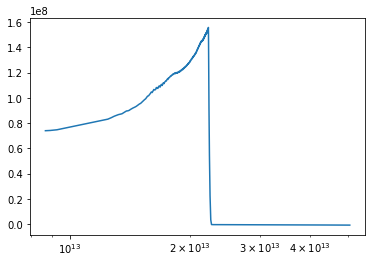

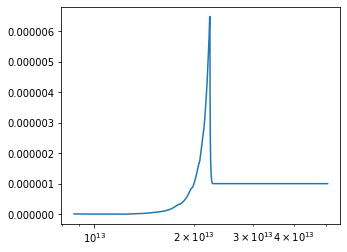

In [7]:
plt.semilogx(h.zones.r,h.zones.v)
plt.figure(figsize=(5,4))
plt.semilogx(h.zones.r,h.zones.d)

### now let's run the code twice as long

In [8]:
h.t_stop=h.t*2.
h.run()

  7300 5.093e+04 1.040e+01
1.621e+30 2.711e+02 4.647e+50 1.925e+51 -2.313e+50 2.158e+51
  7400 5.197e+04 1.043e+01
1.621e+30 2.711e+02 4.649e+50 1.925e+51 -2.312e+50 2.159e+51
  7500 5.301e+04 1.046e+01
1.621e+30 2.711e+02 4.651e+50 1.926e+51 -2.312e+50 2.160e+51
  7600 5.406e+04 1.049e+01
1.621e+30 2.711e+02 4.653e+50 1.927e+51 -2.312e+50 2.161e+51
  7700 5.511e+04 1.053e+01
1.621e+30 2.711e+02 4.654e+50 1.927e+51 -2.312e+50 2.162e+51
  7800 5.617e+04 1.056e+01
1.621e+30 2.711e+02 4.656e+50 1.928e+51 -2.311e+50 2.162e+51
  7900 5.723e+04 1.059e+01
1.621e+30 2.711e+02 4.657e+50 1.929e+51 -2.311e+50 2.163e+51
  8000 5.829e+04 1.062e+01
1.621e+30 2.711e+02 4.658e+50 1.929e+51 -2.311e+50 2.164e+51
  8100 5.935e+04 1.065e+01
1.621e+30 2.711e+02 4.659e+50 1.930e+51 -2.311e+50 2.165e+51
  8200 6.042e+04 1.067e+01
1.621e+30 2.711e+02 4.660e+50 1.931e+51 -2.310e+50 2.166e+51
  8300 6.148e+04 1.070e+01
1.621e+30 2.711e+02 4.661e+50 1.931e+51 -2.310e+50 2.166e+51
  8400 6.256e+04 1.073e+01
1.621

### make the same plots as above.
--in what ways do they look similar and different from before? what has changed?

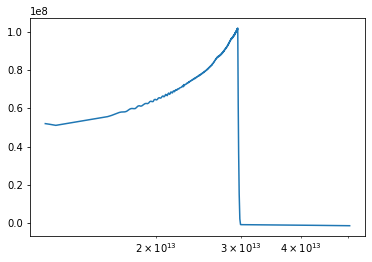

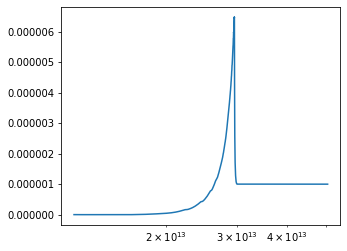

In [9]:
plt.semilogx(h.zones.r,h.zones.v)
plt.figure(figsize=(5,4))
plt.semilogx(h.zones.r,h.zones.d)

In [10]:
h.t

100013.02791029206

### 4. compression in a strong shock wave
--shock waves compress a fluid and increase its density. for a strong shock, the ratio of the density maximum to its post-shock value is $(\gamma+1)/(\gamma-1)$.

--Identify the location of your shock wave in radius. By measuring the density "pre" (upstream, larger radius) and "post" shock (downstream, smaller radius), calculate your numerical value for this quantity. Is it close to what theory predicts?

### 5. now let's use this as a convergence test
--repeat your numerical experiment for a number of zones h.nz = [250, 500, 1000, 2000, 4000]. (You might want to copy/paste below in a new cell for example, or run it in a for loop.)

--make a log-log plot of the error |numerical value - expected value|/|expected value| as a function of the number of zones. How does the error change with the number of zones?

--our numerical method for solving the fluid equations is "second-order accurate," meaning that the error terms scale with $(\Delta r)^2$ or with $N^{-2}$ for $N$ zones. Are your numerical results consistent with this expected scaling?